<a href="https://colab.research.google.com/github/k-tharshini/CODSOFT/blob/main/Data_Science_task_5(credit_card_fraud_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

df = pd.read_csv("/content/creditcard.csv")
df.head(5)

/tmp/ipython-input-2646045424.py:13: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Check class imbalance**

In [ ]:
print(df["Class"].value_counts())

Class
0.0    112741
1.0       241
Name: count, dtype: int64


**Feature scaling**

In [ ]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df.drop(["Time"], axis=1, inplace=True)

**Split features and labels and Drop rows with NaN values in y (and corresponding rows in X)**

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

nan_rows = y.isna()
X = X[~nan_rows]
y = y[~nan_rows]

**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Handle class imbalance using SMOTE (oversampling)**

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

**Choose model (Random Forest or Logistic Regression)**

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Alternatively: model = LogisticRegression(max_iter=1000)

**Train the model**

In [ ]:
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

**Predict and evaluate**

In [ ]:
y_pred = model.predict(X_test)

**--- Confusion Matrix ---**

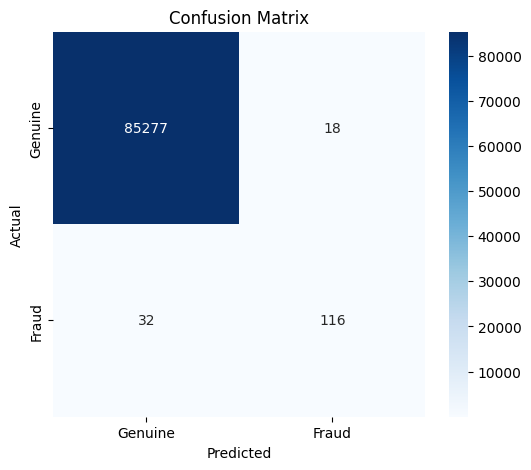

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

**--- ROC Curve ---**

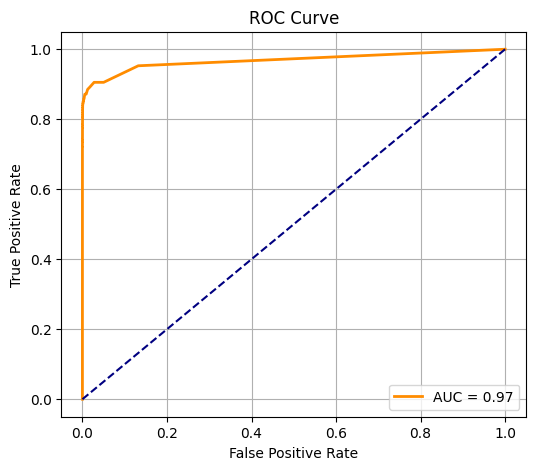

In [ ]:
def plot_roc_curve(y_test, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for class '1'

plot_roc_curve(y_test, y_scores)

**Evaluation**

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[85277    18]
 [   32   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



**Get input frm user and predict the value**

In [ ]:
def get_user_input():
    print("Enter transaction features for prediction:")
    try:
        features = []
        for i in range(1, 29): # V1 to V28
            features.append(float(input(f"PCA Component V{i}: ")))
        amount = float(input("Transaction Amount: "))

        # Scale the amount
        scaled_amount = scaler.transform([[amount]])[0][0]
        features.append(scaled_amount)

        # Assemble into a feature vector
        features_array = np.array([features])
        return features_array
    except ValueError:
        print("Invalid input. Please enter numeric values only.")
        return None
features = get_user_input()
if features is not None:
    prediction = model.predict(features)[0]
    print("Prediction:", "🚨 Fraudulent" if prediction == 1 else "✅ Genuine")

Enter transaction features for prediction:
PCA Component V1: -1.359807134
PCA Component V2: -1.359807134
PCA Component V3: -0.072781173
PCA Component V4: 2.536346738
PCA Component V5: 1.378155224
PCA Component V6: -0.33832077
PCA Component V7: 0.462387778
PCA Component V8: 0.239598554
PCA Component V9: 0.098697901
PCA Component V10: 0.36378697
PCA Component V11: -0.617800856
PCA Component V12: -0.991389847
PCA Component V13: -0.311169354
PCA Component V14: 1.468176972
PCA Component V15: 0.207971242
PCA Component V16: 0.02579058
PCA Component V17: 0.40399296
PCA Component V18: 0.251412098
PCA Component V19: -0.018306778
PCA Component V20: 0.277837576
PCA Component V21: 0.066928075
PCA Component V22: -0.021053053
PCA Component V23: -0.11047391
PCA Component V24: 0.133558377
PCA Component V25: -0.189114844
PCA Component V26: 0.128539358
PCA Component V27: -1.359807134
PCA Component V28: -1.359807134
Transaction Amount: 149.62
Prediction: ✅ Genuine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
